In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
autoencoder = Sequential()

autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))  # 28, 28, 1
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))  # 4, 4, 1

autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='relu'))  # 28, 28, 1

autoencoder.summary()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test))

In [20]:
random_test = np.random.randint(x_test.shape[0], size=5)
ae_imgs = autoencoder.predict(x_test)

In [21]:
random_test

array([9318, 4021, 5221, 7785, 1731])

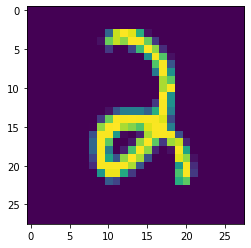

In [22]:
plt.imshow(x_test[9318].reshape(28,28))

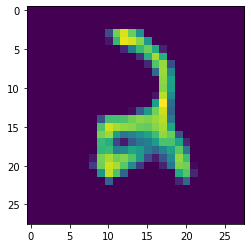

In [24]:
plt.imshow(ae_imgs[9318].reshape(28,28))

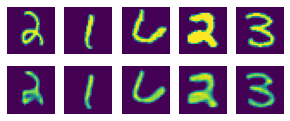

In [26]:
plt.figure(figsize=(7,2))

for i, image_idx in enumerate(random_test):
  ax = plt.subplot(2,7, i+1)
  plt.imshow(x_test[image_idx].reshape(28,28))
  ax.axis('off')
  ax = plt.subplot(2,7, 7+i+1)
  plt.imshow(ae_imgs[image_idx].reshape(28,28))
  ax.axis('off')
plt.show()